In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [5]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [6]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [8]:
val_size, test_size = 0.2, 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [9]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [14]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(x, theta):
    z = np.dot(x, theta)
    y_hat = softmax(z)

    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1/n) * np.sum(y*np.log(y_hat))

def compute_gradient(x, y_hat, y):
    n = y.size
    gradient = (x.T.dot(y_hat - y))/n
    return gradient

def update_weight(theta, gradient, learning_rate):
    return theta - learning_rate*gradient

def compute_accuracy(X, y, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    acc =  (np.argmax(y_hat, axis=1) == np.argmax(y,axis=1)).mean()
    return acc

In [15]:
learning_rate = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size = (n_features, n_classes)
)

In [16]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        x_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(x_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(x_i, y_hat, y_i)
        theta = update_weight(theta, gradient, learning_rate)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')




EPOCH 1:	Training loss : 0.300	Validation loss : 0.297

EPOCH 2:	Training loss : 0.176	Validation loss : 0.174

EPOCH 3:	Training loss : 0.115	Validation loss : 0.113

EPOCH 4:	Training loss : 0.081	Validation loss : 0.080

EPOCH 5:	Training loss : 0.062	Validation loss : 0.061

EPOCH 6:	Training loss : 0.049	Validation loss : 0.049

EPOCH 7:	Training loss : 0.041	Validation loss : 0.041

EPOCH 8:	Training loss : 0.035	Validation loss : 0.035

EPOCH 9:	Training loss : 0.031	Validation loss : 0.031

EPOCH 10:	Training loss : 0.028	Validation loss : 0.027

EPOCH 11:	Training loss : 0.025	Validation loss : 0.025

EPOCH 12:	Training loss : 0.023	Validation loss : 0.023

EPOCH 13:	Training loss : 0.021	Validation loss : 0.021

EPOCH 14:	Training loss : 0.020	Validation loss : 0.020

EPOCH 15:	Training loss : 0.019	Validation loss : 0.018

EPOCH 16:	Training loss : 0.017	Validation loss : 0.017

EPOCH 17:	Training loss : 0.017	Validation loss : 0.016

EPOCH 18:	Training loss : 0.016	Validat

Text(0.5, 1.0, 'Validation Accuracy')

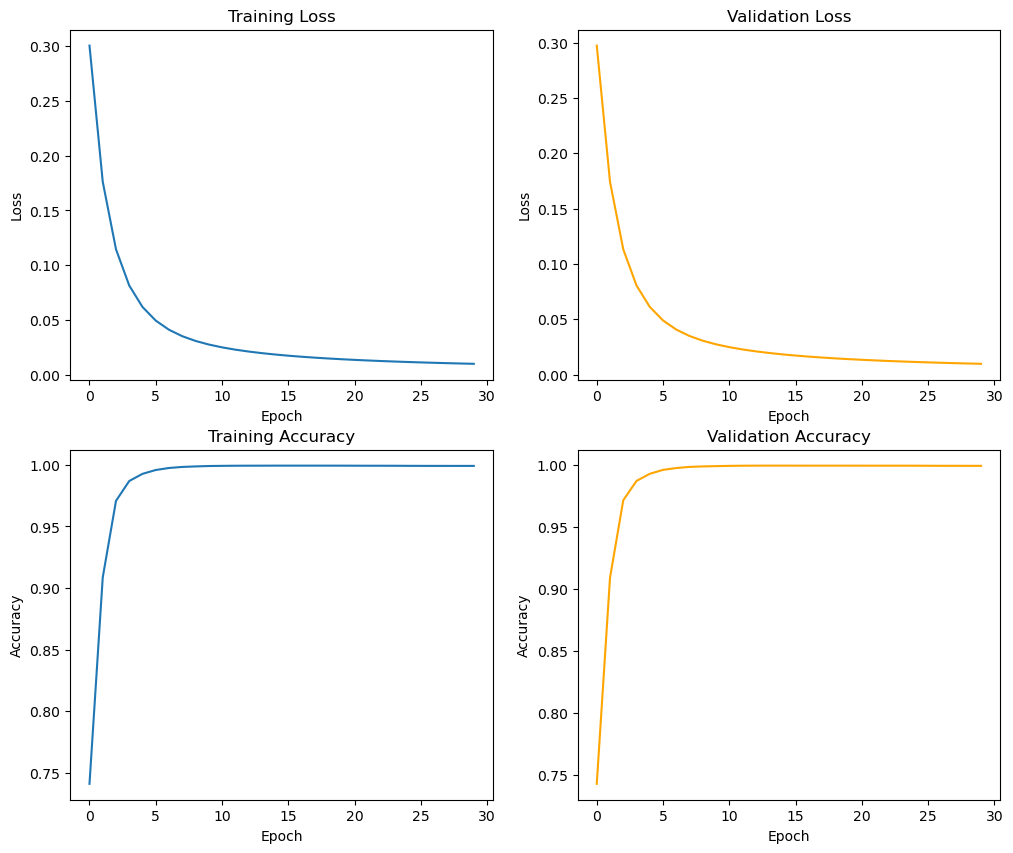

In [17]:
fid, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0 , 1].plot( val_losses , 'orange')
ax[0 , 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs, 'orange')
ax[1 , 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

In [18]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.9993153330290369
Accuracy : 0.9992275552122467


### Twitter Sentiment Analysis

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(
    dataset_path
)

In [22]:
df = df.dropna()

In [23]:
def text_normalize(text):
    text = text.lower()

    #Remove old acronym RT
    text = re.sub(r'^rt[\s]+', '', text)

    #Remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    #Remove stopwords
    text = re.sub(r'[^\w\s]', '', text)

    #Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    #Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    
    return text

In [24]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [25]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [31]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [32]:
val_size, test_size = 0.2, 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [33]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

def predict(x, theta):
    z = np.dot(x, theta)
    y_hat = softmax(z)

    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1/n) * np.sum(y*np.log(y_hat))

def compute_gradient(x, y_hat, y):
    n = y.size
    gradient = (x.T.dot(y_hat - y))/n
    return gradient

def update_weight(theta, gradient, learning_rate):
    return theta - learning_rate*gradient

def compute_accuracy(X, y, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    acc =  (np.argmax(y_hat, axis=1) == np.argmax(y,axis=1)).mean()
    return acc

In [34]:
learning_rate = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size = (n_features, n_classes)
)

In [35]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        x_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(x_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(x_i, y_hat, y_i)
        theta = update_weight(theta, gradient, learning_rate)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')




EPOCH 1:	Training loss : 0.377	Validation loss : 0.376

EPOCH 2:	Training loss : 0.377	Validation loss : 0.376

EPOCH 3:	Training loss : 0.377	Validation loss : 0.376

EPOCH 4:	Training loss : 0.376	Validation loss : 0.375

EPOCH 5:	Training loss : 0.376	Validation loss : 0.375

EPOCH 6:	Training loss : 0.376	Validation loss : 0.375

EPOCH 7:	Training loss : 0.375	Validation loss : 0.374

EPOCH 8:	Training loss : 0.375	Validation loss : 0.374

EPOCH 9:	Training loss : 0.375	Validation loss : 0.374

EPOCH 10:	Training loss : 0.374	Validation loss : 0.373

EPOCH 11:	Training loss : 0.374	Validation loss : 0.373

EPOCH 12:	Training loss : 0.374	Validation loss : 0.373

EPOCH 13:	Training loss : 0.374	Validation loss : 0.373

EPOCH 14:	Training loss : 0.373	Validation loss : 0.372

EPOCH 15:	Training loss : 0.373	Validation loss : 0.372

EPOCH 16:	Training loss : 0.373	Validation loss : 0.372

EPOCH 17:	Training loss : 0.372	Validation loss : 0.372

EPOCH 18:	Training loss : 0.372	Validat

Text(0.5, 1.0, 'Validation Accuracy')

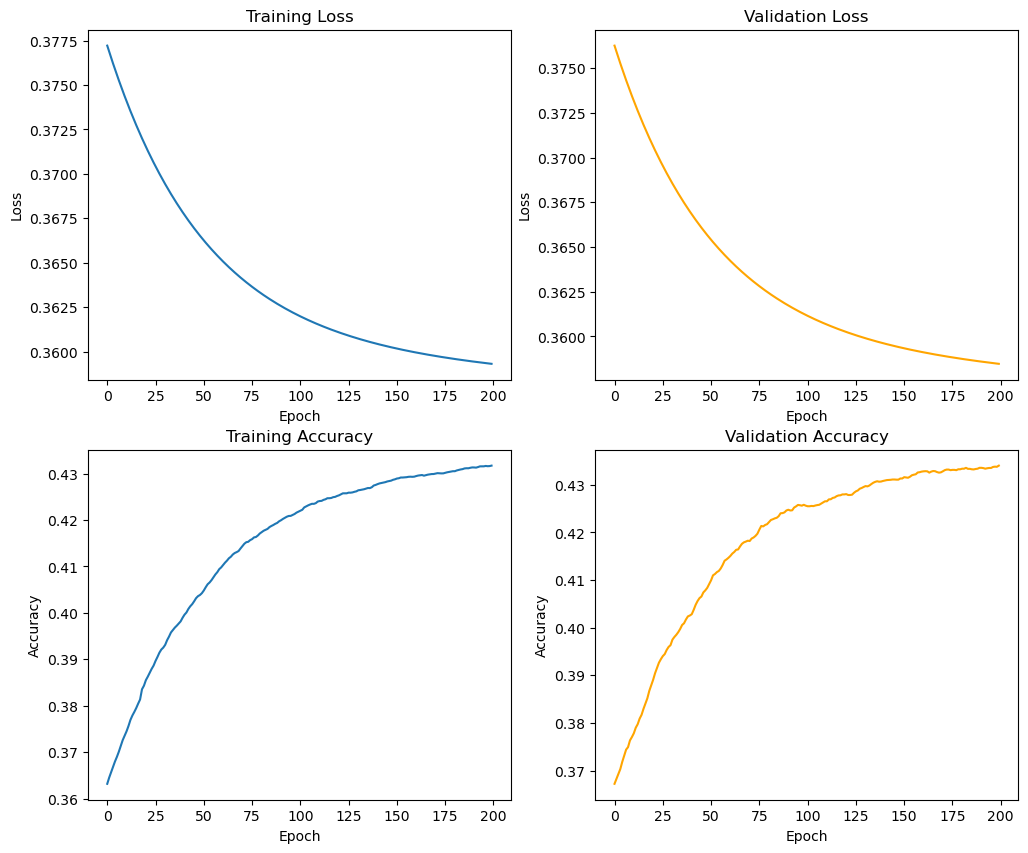

In [36]:
fid, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0 , 1].plot( val_losses , 'orange')
ax[0 , 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs, 'orange')
ax[1 , 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

In [37]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.4340369393139842
Accuracy : 0.4322881511934712
